# Import Libraries

In [1]:
# importing required packages
import pandas as pd
import pandas_profiling
import numpy as np



%matplotlib inline
from pathlib import Path
from pandas.io.json import json_normalize
import pyarrow as pa   
import pyarrow.parquet as pq
from fastparquet import ParquetFile
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob, Word
from sklearn.externals import joblib
import json



C:\Users\Alrayan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Load dataset

In [2]:
data = pd.read_csv('C:\\Users\\Alrayan\\Desktop\\Optability\\AI DC Program\\AIDI-2005-02 - CAPSTONE TERM II\\Canabis WM Data\\WeedMap Reviews\\weed_final.csv')

In [3]:
df = data.copy()

# Explantory Data Analysis

In [4]:
df.shape

(34279, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34279 entries, 0 to 34278
Data columns (total 8 columns):
Brand                  34279 non-null object
Product                34278 non-null object
Product Name           34279 non-null object
Product Description    34274 non-null object
Customer Name          34276 non-null object
Customer Rating        34276 non-null object
Review                 33716 non-null object
Locations              34279 non-null object
dtypes: object(8)
memory usage: 2.1+ MB


In [6]:
df.columns

Index(['Brand', 'Product', 'Product Name', 'Product Description',
       'Customer Name', 'Customer Rating', 'Review', 'Locations'],
      dtype='object')

In [7]:
df.head()

,Brand,Product,Product Name,Product Description,Customer Name,Customer Rating,Review,Locations
0,00 Seeds,Cultivation,White Widow,"Selección de White Widow, planta compacta de g...",legitplug001,5,CALL OR TEXT...310.912.31.45 Got Buds/Edibles/...,No Retailers Found Near You
1,00 Seeds,Cultivation,White Widow,"Selección de White Widow, planta compacta de g...",Manue3,5,"I have medical cannabis for sale 0z 250, 1/8lb...",No Retailers Found Near You
2,00 Seeds,Cultivation,White Widow,"Selección de White Widow, planta compacta de g...",autreykenneth,5,one of the best strains ihave ever tried,No Retailers Found Near You
3,00 Seeds,Cultivation,White Widow,"Selección de White Widow, planta compacta de g...",RasRojas,4,como compro weeed,No Retailers Found Near You
4,00 Seeds,Cultivation,White Widow,"Selección de White Widow, planta compacta de g...",Kathyd47,4,Need. Intact info for online or phone call in ...,No Retailers Found Near You


In [8]:
df.tail()

,Brand,Product,Product Name,Product Description,Customer Name,Customer Rating,Review,Locations
34274,Zur Blüte,Flower,Green Dragon CBD - 10g,Die Sorte hat einen THC-Gehalt von,,,,No Retailers Found Near You
34275,Zur Blüte,Flower,Sour Tangie CBD - 10g,CBD-Gehalt bis zu 4% und THC-Gehalt,,,,No Retailers Found Near You
34276,Zur Blüte,Concentrates,Super Lemon Haze CBD-Pollinat - 10g,"Die Sorte hat einen CBD-Gehalt von 8,15% und e...",,,,No Retailers Found Near You
34277,Zur Blüte,Flower,Sour Tangie CBD - 5g,CBD-Gehalt bis zu 4% und THC-Gehalt,,,,No Retailers Found Near You
34278,Zur Blüte,Concentrates,Super Lemon Haze CBD-Pollinat - 5g,"Die Sorte hat einen CBD-Gehalt von 8,15% und e...",,,,No Retailers Found Near You


In [9]:
pandas_profiling.ProfileReport(df)

### Check null values

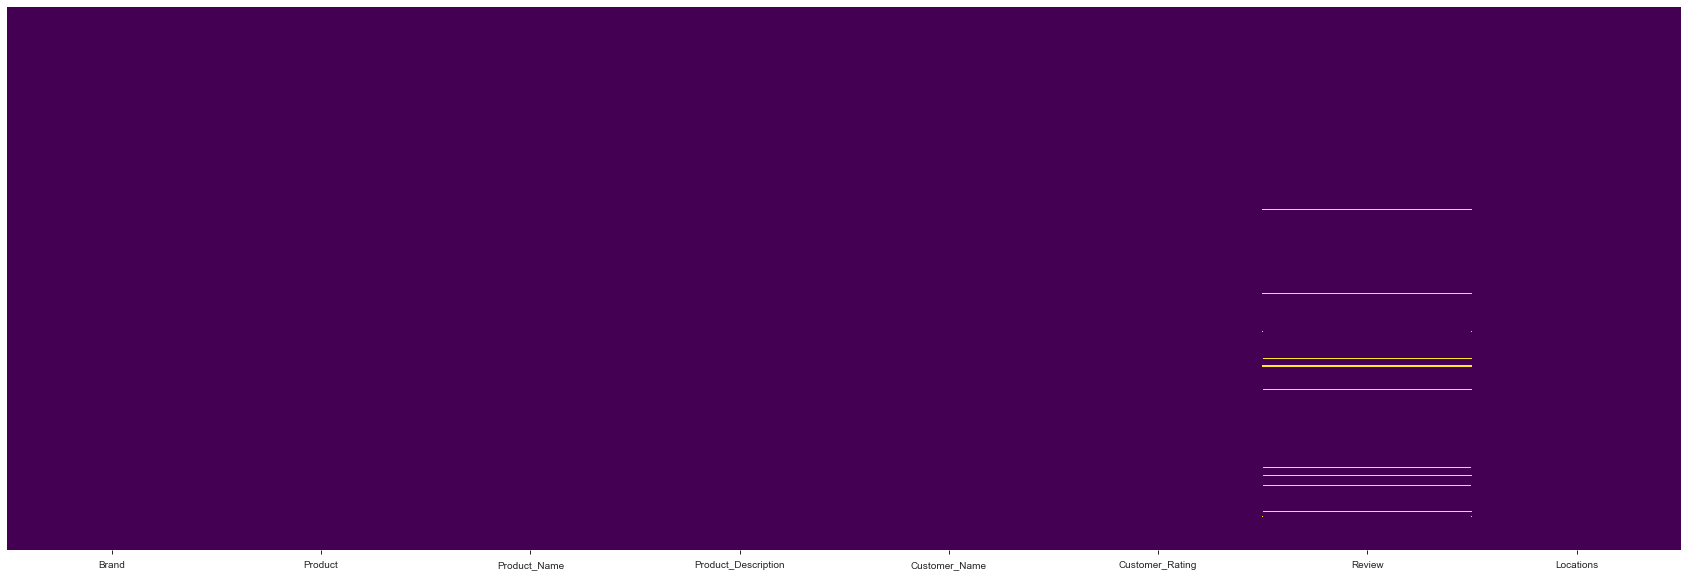

In [10]:
# Plots a heat map to show where there are null values in each of the parameters. 
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

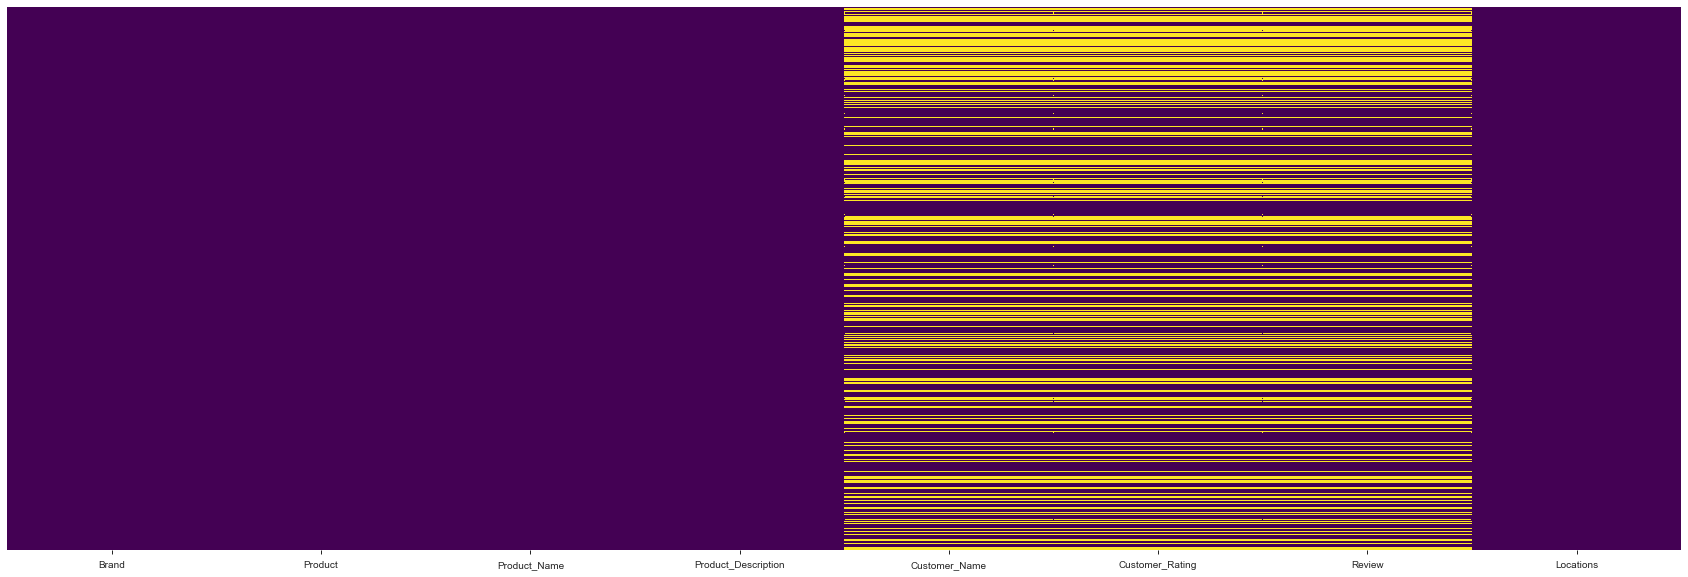

In [11]:
# Plots a heat map to show where there is a space values in each of the parameters. 
plt.figure(figsize=(30,10))
sns.heatmap(df.isin([' ']), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
df[df.isin([' '])].count()

Brand                      0
Product                    0
Product_Name               0
Product_Description        0
Customer_Name          13586
Customer_Rating        13586
Review                 13586
Locations                  0
dtype: int64

In [13]:
df['Customer_Rating'].value_counts()

5      16939
       13586
4       1283
1       1234
3        674
2        441
4.8       25
4.5       18
4.3       17
4.7       14
4.2       11
2.2        5
1.2        5
3.7        5
2.8        3
2.5        3
2.7        3
3.5        3
1.3        2
3.8        2
2.3        1
3.3        1
3.2        1
Name: Customer_Rating, dtype: int64

### Observations:
1. The data consist of 34279 records of reviews
2. The majority of the data types are object "text" with exception to customer ratings has numerical values 
3. The dataset contains about 0.2% of missing cells and 1.2% of duplicate rows
4. The dataset has over 13K records of no reviews
4. The majority of variables contain high cardinality values (i.e. the column contains a large percentage of totally unique values)
5. No correlation between variables due to the majority of data are objects
6. The review column contains numerical, special characters and text
7. The data set contains a lot of null values about 50% in customer name, customer rating and review
8. Feature extraction is required to develop insights about the data

---

# Data Preprocessing

### Change Value where there is null or a single space

In [14]:
df["Review"].fillna("No Data", inplace = True)

In [15]:
df["Review"].replace(to_replace=' ', value='No Data', regex=True)

0        CALLNo DataORNo DataTEXT...310.912.31.45No Dat...
1        INo DatahaveNo DatamedicalNo DatacannabisNo Da...
2        oneNo DataofNo DatatheNo DatabestNo Datastrain...
3                            comoNo DatacomproNo Dataweeed
4        Need.No DataIntactNo DatainfoNo DataforNo Data...
                               ...                        
34274                                              No Data
34275                                              No Data
34276                                              No Data
34277                                              No Data
34278                                              No Data
Name: Review, Length: 34279, dtype: object

In [17]:
df["Customer_Name"].replace(to_replace=' ', value='No Data', regex=True)

0         legitplug001
1               Manue3
2        autreykenneth
3             RasRojas
4             Kathyd47
             ...      
34274          No Data
34275          No Data
34276          No Data
34277          No Data
34278          No Data
Name: Customer_Name, Length: 34279, dtype: object

---

### Text Analysis

After a brief inspection of the data, a series of data pre-processing have to be conducted.
1. Remove the rows where data is missing
2. Clean “Review” column
3. Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment
4. Create new feature for the length of the review
5. Create new feature for the word count of the review
6. Create new features based on customer name to determine if there is a relationship between customer orders and type of product, sentiment etc...
7. 

### Remove rows where data is missing

### Star Rating Distribution

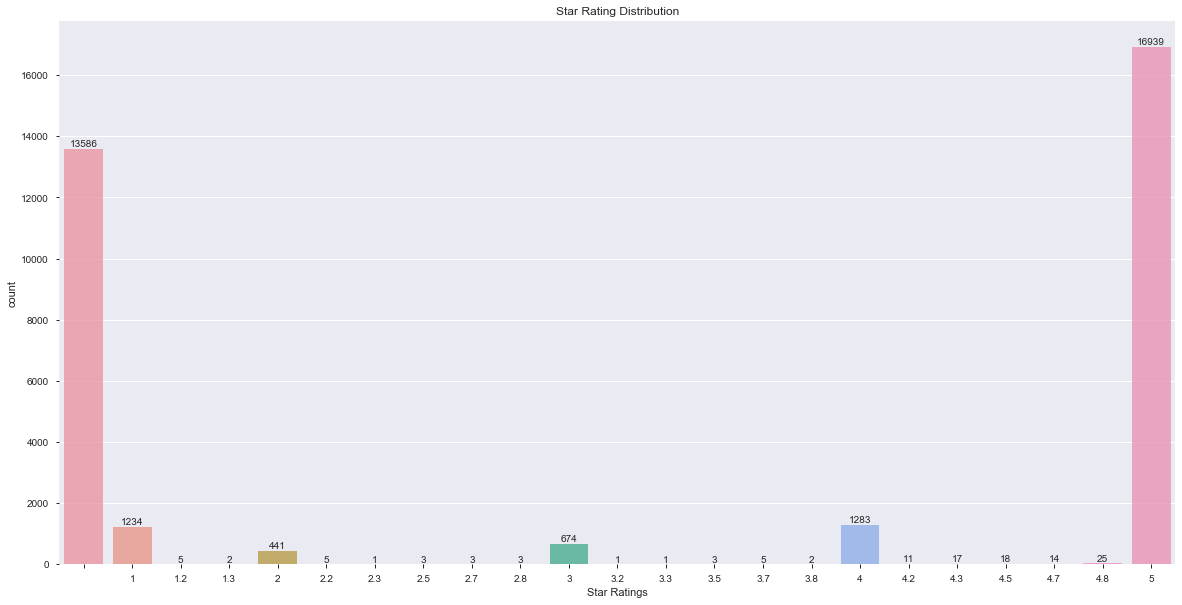

In [18]:
x=df['Customer_Rating'].value_counts()
x=x.sort_index()
plt.figure(figsize=(20,10))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('count')
plt.xlabel('Star Ratings')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

## Polarity & Subjectivity Analysis

In [20]:
sample_reviews = df[['Customer_Rating', 'Review']].sample(34279)

In [21]:
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

In [22]:
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [23]:
sample_reviews['polarity']=0
sample_reviews['subjectivity']=0
for i in range(34279):
    sample_reviews['polarity'].iloc[i]= detect_polarity(df['Review'].iloc[i])
    sample_reviews['subjectivity'].iloc[i]= detect_subjectivity(df['Review'].iloc[i])
    i+=1
sample_reviews.head()

C:\Users\Alrayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Customer_Rating,Review,polarity,subjectivity
25609,5,Hands down best no one can compare right now,0.277500,0.460000
16407,5,"Best gummy I've ever had, EVER! Great for anxi...",0.070238,0.413745
19546,,,1.000000,0.300000
946,,,0.000000,0.000000
13861,5,So good,0.000000,0.000000


### Distribution of Polarity & Subjectivity

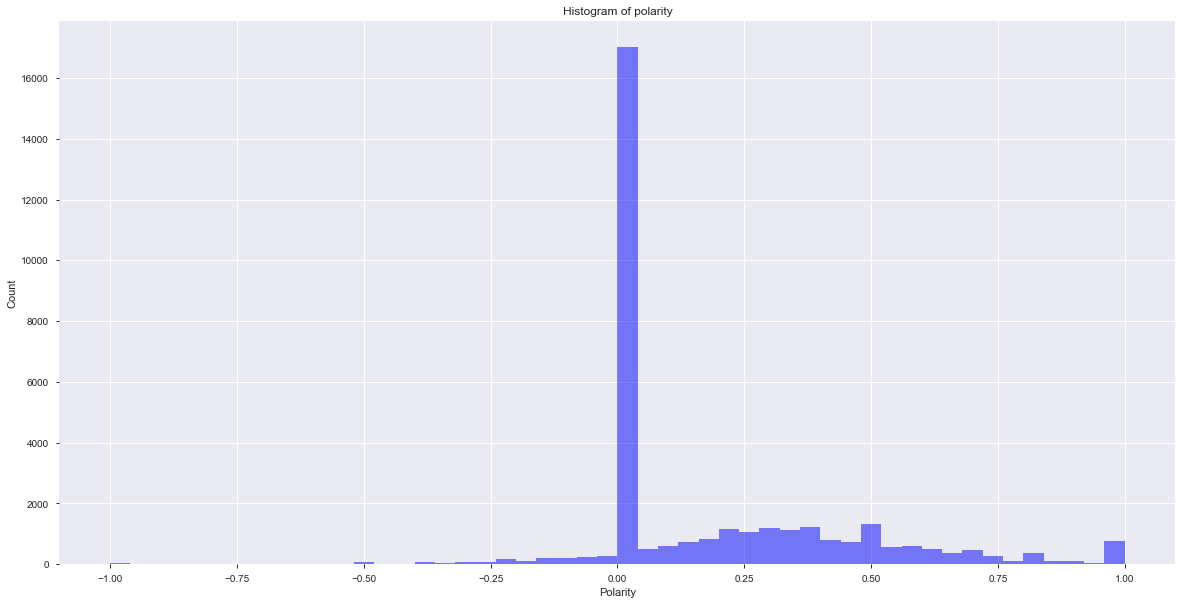

In [24]:
num_bins = 50
plt.figure(figsize=(20,10))
n, bins, patches = plt.hist(sample_reviews.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

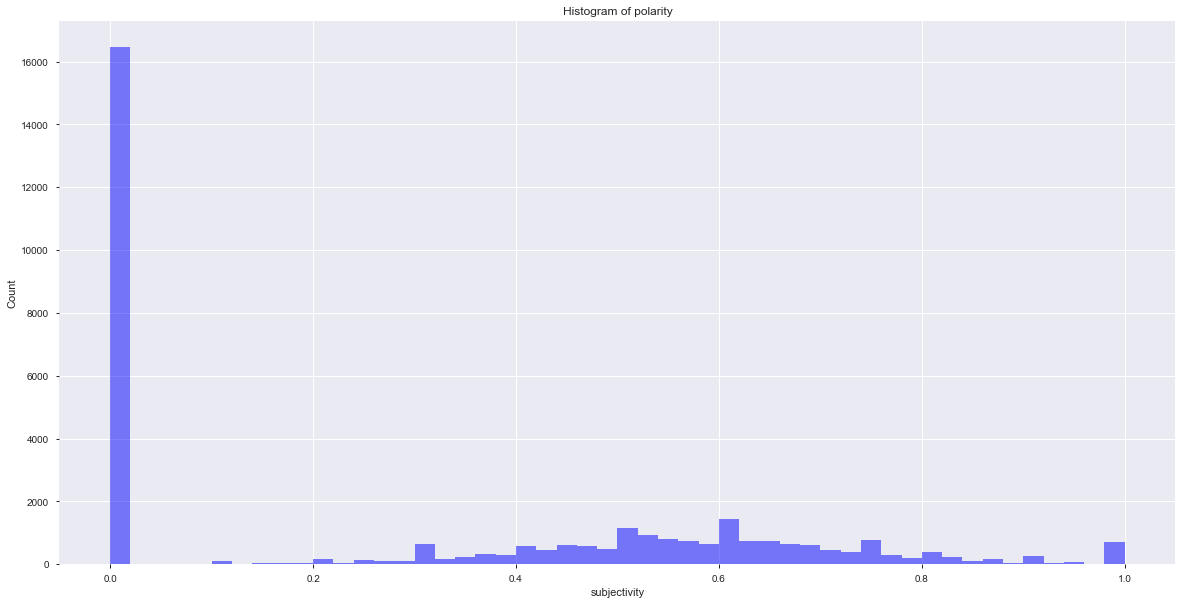

In [25]:
num_bins = 50
plt.figure(figsize=(20,10))
n, bins, patches = plt.hist(sample_reviews.subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('subjectivity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

### Observations:
1. Plority of 0 is the highest because a lot of products have no reviews
2. Most polarity scores are above zero, meaning most of the reviews are positive sentiment in the data, this is in line with the star rating distribution we discovered earlier.

### Polarity Grouped by Stars

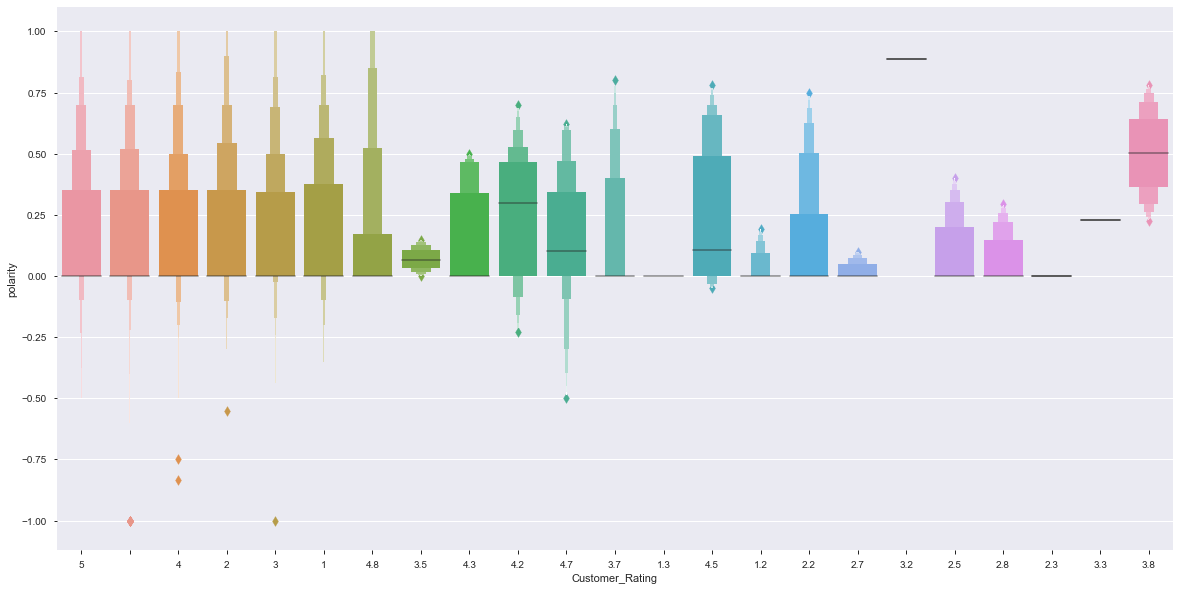

In [26]:
plt.figure(figsize=(20,10))
sns.boxenplot(x='Customer_Rating', y='polarity', data=sample_reviews)
plt.show();

### Observations:
1. In general, we’d expect negative polarity when customer rating is low i.e 1 to 3. Let’s investigate deeper and see whether we can find anything interesting or outlier.

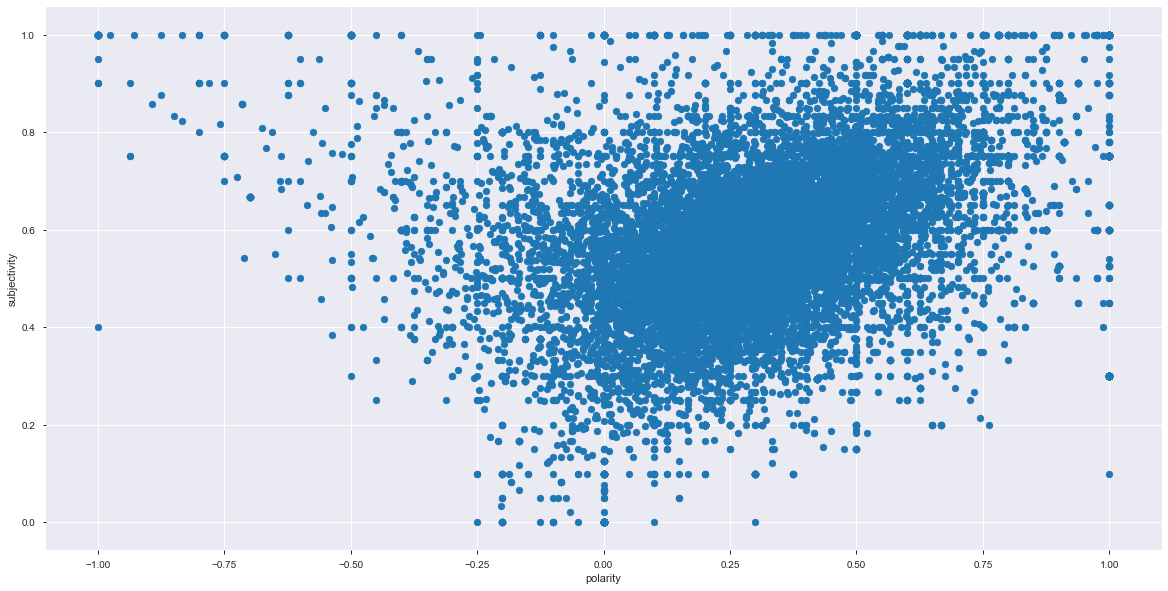

In [27]:
plt.figure(figsize=(20,10))
plt.scatter(x='polarity', y='subjectivity', data=sample_reviews)
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show();

### Reviews that have the lowest polarity

In [28]:
sample_reviews[sample_reviews.polarity == -1].head()

,Customer_Rating,Review,polarity,subjectivity
20620,5,These are consistently good flavor and consist...,-1.0,1.0
21347,5,the terp were Amazing inn this and very potent...,-1.0,1.0
22068,,,-1.0,1.0
7751,3,TOP ON DECK AT CHEAP RATEs Fast EXPRESS DELIVE...,-1.0,1.0
12703,,,-1.0,1.0


### Reviews that have lowest polarity (most negative sentiment) but with a 5-star:

In [30]:
sample_reviews[(sample_reviews['Customer_Rating'] == "5") & (sample_reviews.polarity == -1)].head()

,Customer_Rating,Review,polarity,subjectivity
20620,5,These are consistently good flavor and consist...,-1.0,1.0
21347,5,the terp were Amazing inn this and very potent...,-1.0,1.0
19624,5,This is a go to for so many aches and pains. I...,-1.0,1.0
12562,5,more guice please,-1.0,0.9
15647,5,one of the best strains I've tried but I'm hav...,-1.0,1.0


### Reviews that have the highest polarity (most positive sentiment) but with a 1-star:

In [31]:
sample_reviews[(sample_reviews['Customer_Rating'] == "1") & (sample_reviews.polarity == 1)].head()

,Customer_Rating,Review,polarity,subjectivity
17597,1,Saw these people out in phoenix and they gave ...,1.0,1.00
20079,1,Not happy,1.0,0.65
6279,1,when i got the og kush vape the past two times...,1.0,0.30
30199,1,I don't understand what all these good reviews...,1.0,0.75
6527,1,Do not Buy these cartis. Ive thrown up off of ...,1.0,1.00


### Features Extraction 

In [32]:
df['review_len'] = df['Review'].astype(str).apply(len)

df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

### The distribution review text lengths

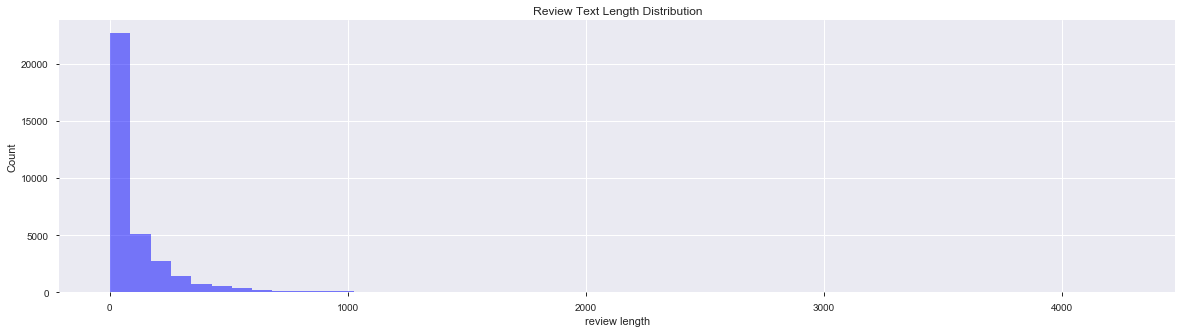

In [47]:
num_bins = 50
plt.figure(figsize=(20,5))
n, bins, patches = plt.hist(df['review_len'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('review length')
plt.ylabel('Count')
plt.title('Review Text Length Distribution')
plt.show();

### The distribution of review word count

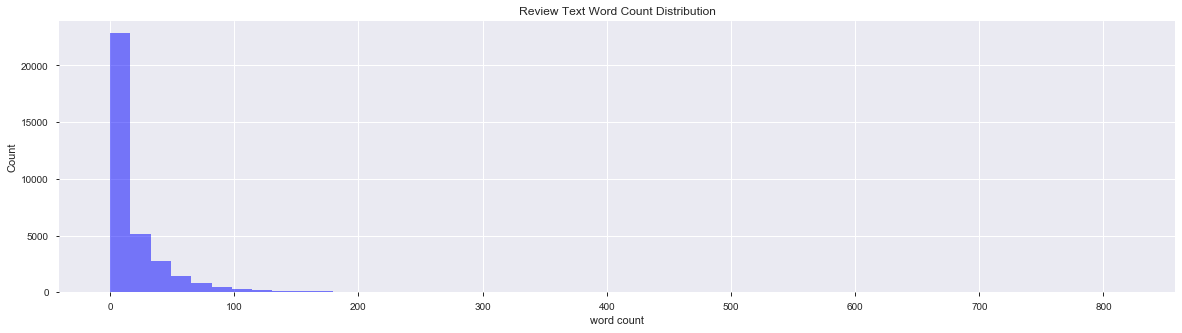

In [49]:
num_bins = 50
plt.figure(figsize=(20,5))
n, bins, patches = plt.hist(df['word_count'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('word count')
plt.ylabel('Count')
plt.title('Review Text Word Count Distribution')
plt.show();